# <center> Data Science Capstone
    
## <center> Predicting Buenos Aires House Prices with Linear Regression

![alt text](bsas.jpg)
<center> Figure 1. Buenos Aires, Argentina.

## _Table of Contents_

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 2>

1. <a href="#item1">Introduction</a>


2. <a href="#item2">Data</a>


3. <a href="#item3">Methodology</a>


4. <a href="#item4">Results</a>


5. <a href="#item5">Discussion</a>    


6. <a href="#item5">Conclusion</a>    


<a href="#item5">References</a>    



</font>
</div>

## 1. Introduction

#### 1.0. Description and Discussion of the Background

As a part of [IBM Data Science Professional Certificate Course](https://www.coursera.org/professional-certificates/ibm-data-science), I decided to develop a model for predicting the monetary value of a house located at the Buenos Aires's area, where I am currently staying. To do that, I will focus on a simple but still fundamental model: Linear Regression. 
Using Foursquare API [1] I will obtain the most common venues of given real estates of Buenos Aires, which will enrich the information of the houses/departments for the final moment of predicting the price of them. A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

The data is provided by Properati [2], the Latin American property search site. On its [web page](https://www.properati.com.ar/?utm_source=properati.com&utm_medium=organic&utm_campaign=redir-from-ip), you can find links to different tools and datasets to use freely in your projects. 

#### 1.1. Business problem

The problem posed for this Project is the development of a regression model that allows predicting the price of a real property of the Buenos Aires city. In order to solve the problem, the following objectives are established:

- Data acquisition.

- Exploratory analysis and dataset cleaning.

- Construction of a linear regression model to make predictions about the price of properties.


#### 1.2. Interest

As a first interest, this Project could allow the company Properati to have an automatic appraiser of real estate for the properties, which are marketed by it.


## 2. Data

First and foremost, let's import some necessary libraries: pandas (library to manipulate dataframe), folium (geoplotting library), matplolib (data visualization library), geopy.geocoders (module to convert an address into latitude and longitude values), requests (library to handle requests), scikit-learn (library to use machine learning algorithm), among others.

In [1]:
#DEPENDENCIES

# ipython interactive 
%matplotlib inline
from tqdm import tqdm_notebook

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# geographic visualization
import folium
from geopy.geocoders import Nominatim

# statistics calculus
from scipy import stats

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# requests handling
import requests 

#### 2.1 Data Source

The Properati real estate company provides us with a dataset of its internal databases corresponding to the first half of 2017. 

(Link for download: https://drive.google.com/file/d/0BzVrTKc02N8qNUdDSExBQlFTNlU/view)

The dataset provided is a 145 MB file with a .csv format (with column delimiter by "comma" and character encoding according to the system 'utf-8-sig').

In [2]:
#load data
df = pd.read_csv("properatti.csv", sep=',', encoding='utf-8-sig')

#preliminar data visualization
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


#### 2.2 Data description¶

The information of each property includes the following data (fields):

- Unnamed (Index)
- operation (Operation type: sell, rent) 
- property_type (Property type: house, apartment, PH) 
- place_name (Name of the neighborhood) 
- place_with_parent_names  
- country_name 
- state_name (Name of the state/city/borough) 
- geonames_id (geographic ID) 
- lat-lon (Latitude and Longitude)
- lat (Latitude)
- lon (Longitude) 
- price (Price of the real state)  
- currency (Unit of the monetary value: ARS, USD, PEN, UYU) 
- price_aprox_local_currency
- price_aprox_usd
- surface_total_in_m2
- surface_covered_in_m2
- price_usd_per_m2
- price_per_m2
- floor
- rooms
- expenses
- properati_url
- description
- title
- image_thumbnail

The dataset contains a total of 26 fields/columns and 121200 records. However, as it already was declarated, for this project I will focus only on the city of Buenos Aires, which result in 32316 records.

In [3]:
# filtering buenos aires city
df = df[df['state_name']=='Capital Federal'] 

#### 2.3 Data wrangling

Enough effort of this work focuses on data wrangling tasks such as imputation of missing values of certain variables. For this type of tasks, _Pandas_ tools are used, such as _groupby_ , _aggregation_ operations and other applications and methods of the DataFrames to address data cleaning, data extraction and data transformation, in order to build the final dataset. 

- **Variable selection**

Based on different criteria, unnecessary variables were eliminated for the purpose of the project:

_irrelevant variables:_

    - "Unamed",
    - "title",
    - "properati_url"
    - "image_thumbnail".

_constant variables:_

    - "operation" (_shell_)
    - "country_name" (_Argentina_)
    - "state_name" (_Capital Federal_)

_variables with many missing values_

    - "expenses"
    - "floor"

_redundant variables:_
    
    - price_aprox_local_currency
    - currency
    - price
    - price_usd_per_m2
    - price_per_m2
    - geonames_id
    - place_with_parent_names

In [4]:
# dropping variables
vars_to_drop= ['Unnamed: 0',
               'title',
               'floor',
               'properati_url',
               'image_thumbnail',
               'operation', 
               'country_name', 
               'expenses',
               'state_name',
               'price_aprox_local_currency', 
               'currency',
               'price',
               'price_usd_per_m2',
               'price_per_m2',
               'geonames_id',
               'place_with_parent_names']

var_selected = [x for x in df.columns if x not in vars_to_drop]
df = df[var_selected]

- **Variable extraction**

In [5]:
# aditional information
df['rooms_2'] = df['description'].str.lower().str.extract("(\d{1,2})( amb\D+)")[0]

- **Missing values handling**

In [6]:
# for *rooms*
df['rooms'].fillna(df['rooms_2'], inplace=True)
df['rooms'] = df['rooms'].astype('float')
mean_room = df['rooms'].mean()
df['rooms'].fillna(mean_room, inplace=True)
df.drop(columns=['rooms_2', 'description'], inplace=True)

# dropping nan values
df = df.dropna(axis=0)

# verifying
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16553 entries, 0 to 121217
Data columns (total 9 columns):
property_type            16553 non-null object
place_name               16553 non-null object
lat-lon                  16553 non-null object
lat                      16553 non-null float64
lon                      16553 non-null float64
price_aprox_usd          16553 non-null float64
surface_total_in_m2      16553 non-null float64
surface_covered_in_m2    16553 non-null float64
rooms                    16553 non-null float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


- **Outliers values handling**

In [7]:
df = df[(np.abs(stats.zscore(df[['price_aprox_usd']])) < 3)]

#### 2.4. Cleaned Data

In [8]:
#DATASET
df = df.reset_index(drop=True)
print('Dataset shape: ', df.shape)
# preliminar dataset
df.head()

Dataset shape:  (16274, 9)


,property_type,place_name,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms
0,PH,Mataderos,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,55.0,40.0,2.00000
1,apartment,Mataderos,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,55.0,55.0,2.00000
2,apartment,Belgrano,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,45.0,40.0,2.75529
3,apartment,Belgrano,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,65.0,60.0,2.75529
4,PH,Mataderos,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,140.0,98.0,4.00000


Folium is a python library that can create interactive leaflet map using coordinate data. Since I am interested in places, but in our dataset this represents 16274 spots, only 200 points are displayed for display purposes.

In [10]:
#GEOVISUALIZATION

# buenos aires geoloc
address = 'Buenos Aires'
geolocator = Nominatim(user_agent="bsas_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Buenos Aires, Argentina, are {}, {}.'.format(latitude, longitude))

# map of Buenos Aires using latitude and longitude values
map_baires = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Toner')
# add markers to map
df_sample = df.iloc[0:200,:]
for lat, lng, label in zip(df_sample['lat'], df_sample['lon'], df_sample['place_name']):
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(map_baires)  

#visualize 
print('\nSome real estates')
map_baires

The geograpical coordinate of Buenos Aires, Argentina, are -34.6075682, -58.4370894.

Some real estates


## 3. Methodology

In this project, I will use the Foursquare API to explore real estates marketed by Properati in Buenos Aires, get the most common venue categories in each real estate, use the Linear Regression algorithm to predict the monetary value of real esates, use the Folium library to visualize the pricing distribution at Buenos Aires.

#### 3.1. Data enrichment with Foursquare API

Foursquare is a technology company that built a massive dataset of location data [2]. By communicating with the Foursquare database and making calls to its API, I can retrieve search for a specific type of venues or stores around a given location.

In [10]:
CLIENT_ID = 'ZYDJSFGJ2EG4VZ5KBBJWNYOAMWXSNOY2VIAHIW3MCPLKKC15' # my Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 200 # define radius (meters)

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in tqdm_notebook(zip(names, latitudes, longitudes)):
        try:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        except:
            pass
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'lat', 
                  'lon', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
# getting venue info
baires_venues = getNearbyVenues(names=df['place_name'], 
                                latitudes=df['lat'],
                                longitudes=df['lon'],
                               radius=radius,
                               LIMIT=LIMIT)
# new info
baires_venues.head()

,Neighbourhood,lat,lon,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mataderos,-34.652262,-58.522982,Club Atlético Juventud de Liniers,-34.651691,-58.524712,Sports Club
1,Mataderos,-34.652262,-58.522982,Argenchino,-34.652737,-58.523956,Convenience Store
2,Belgrano,-34.559873,-58.443362,Starbucks,-34.559578,-58.445202,Coffee Shop
3,Belgrano,-34.559873,-58.443362,Côte Café,-34.559804,-58.443390,Bistro
4,Belgrano,-34.559873,-58.443362,Harrods Gath & Chaves,-34.560707,-58.442292,Athletics & Sports


In [11]:
#save dataset
filename = 'baires_venues.csv'
#baires_venues.to_csv(filename)

#load
baires_venues = pd.read_csv(filename)

#### 3.2. Exploratory Data Analysis

There are 62 unique neighbourhoods.

In [14]:
# distinct neighbourhoods
len(df.place_name.unique())

62

- **Exploration of price in Buenos Aires**

From the dataframe that I had to create for exploratory data analysis, in average the most expensive neighbourhoods from the house price point of view are "Puerto Madero", "Palermo Chico" and "Catalinas", and on the other hands, the cheapest real estates are in "Villa Soldati" and "Constitucion".

Also, exploring the relationship between real estate monetary value against surface or rooms, the figures show a high postive  correlation and a poor correlation for each variable respectively.  

No handles with labels found to put in legend.


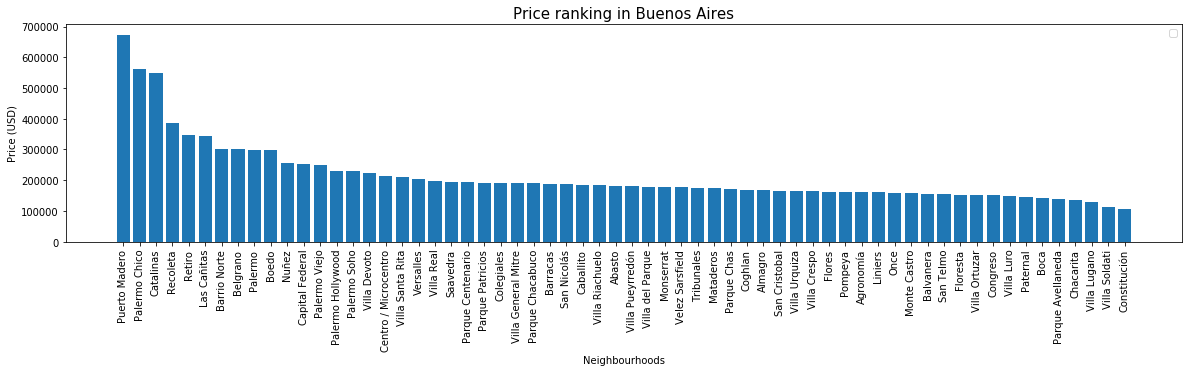

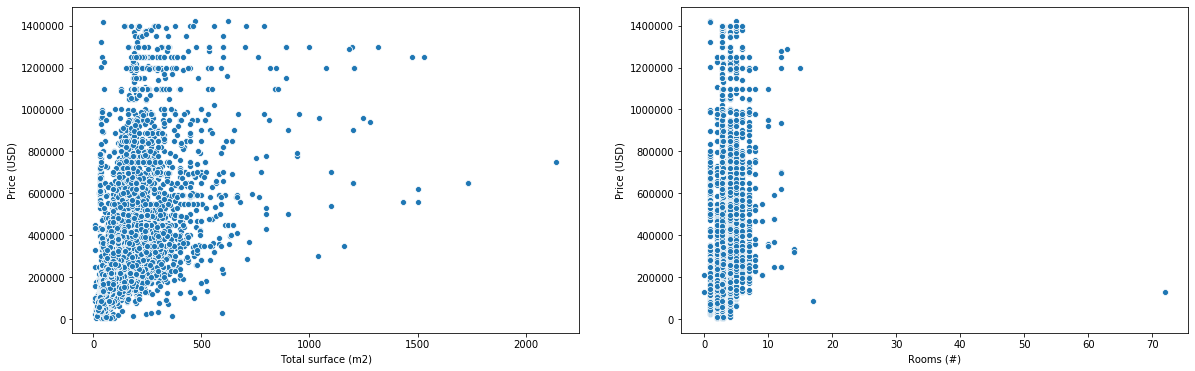

In [15]:
#price ranking per Neighbourhoods
abc = df.groupby("place_name")["price_aprox_usd"].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 4))
plt.bar(abc.index,abc.values)
plt.legend(loc=0)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhoods')
plt.ylabel('Price (USD)')
plt.title('Price ranking in Buenos Aires', size=15)
plt.show()

plt.figure(figsize=(20, 6))
#price vs surface
plt.subplot(121)
sns.scatterplot(x="surface_total_in_m2", y="price_aprox_usd", data=df)
plt.xlabel('Total surface (m2)')
plt.ylabel('Price (USD)')
#price vs rooms
plt.subplot(122)
sns.scatterplot(x="rooms", y="price_aprox_usd", data=df)
plt.xlabel('Rooms (#)')
plt.ylabel('Price (USD)')
plt.show()

- **Exploration of each Neighbourhoods in Buenos Aires**

We can also look that, in general, the most expensive neighbourhoods have more venues. **Note that this is important because it shows that, in some way, the number of venues could influence the price of a home.** 

In [35]:
#checking how many different venues categories were returned
print('There are {} uniques categories.'.format(len(baires_venues['Venue Category'].unique())))

#checking how many venues were returned for each neighborhood
baires_venues.groupby('Neighbourhood').size().reset_index(name='Venue_count').sort_values(by='Venue_count', ascending=False)

There are 275 uniques categories.


,Neighbourhood,Venue_count
40,Recoleta,1325
5,Barrio Norte,1215
27,Palermo,1061
6,Belgrano,1006
49,Villa Crespo,929
9,Caballito,770
30,Palermo Soho,660
39,Puerto Madero,504
45,San Telmo,466
2,Almagro,460


In [17]:
# one hot encoding
baires_onehot = pd.get_dummies(baires_venues[['Venue Category']], prefix="", prefix_sep="")
baires_onehot['lat-lon'] = df['lat-lon']
fixed_columns = [baires_onehot.columns[-1]] + list(baires_onehot.columns[:-1])
baires_onehot = baires_onehot[fixed_columns]

# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
baires_grouped = baires_onehot.groupby('lat-lon').mean().reset_index()

# join all
df = df.merge(baires_grouped, on=['lat-lon'], how='inner')
df = df.drop(columns='lat-lon', axis=0)
df.head()

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,Accessories Store,Adult Boutique,...,Venezuelan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,PH,Mataderos,-34.661824,-58.508839,62000.0,55.0,40.0,2.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,apartment,Mataderos,-34.652262,-58.522982,72000.0,55.0,55.0,2.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,apartment,Belgrano,-34.559873,-58.443362,138000.0,45.0,40.0,2.75529,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,apartment,Belgrano,-34.559873,-58.443362,195000.0,65.0,60.0,2.75529,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH,Mataderos,-34.652356,-58.501624,239000.0,140.0,98.0,4.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Result

Finally, we try to train a regression model with de above dataset. So my expectation would be based on the new information from the Foursquare API, the prediction will be more accurate. But before to do that, I have to perform some feature engineering tasks. 

#### 4.1. Feature Engineering

I need to perform categorical variable encoding and variable standrizations.

In [18]:
#one-hot encoding
dummies_type = pd.get_dummies(df['property_type'], drop_first= True, prefix='type')
dummies_neig = pd.get_dummies(df['place_name'], drop_first= True, prefix='')
df = pd.concat([df, dummies_type, dummies_neig], axis=1)

df.head()

,property_type,place_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,Accessories Store,Adult Boutique,...,_Villa Lugano,_Villa Luro,_Villa Ortuzar,_Villa Pueyrredón,_Villa Real,_Villa Riachuelo,_Villa Santa Rita,_Villa Soldati,_Villa Urquiza,_Villa del Parque
0,PH,Mataderos,-34.661824,-58.508839,62000.0,55.0,40.0,2.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,apartment,Mataderos,-34.652262,-58.522982,72000.0,55.0,55.0,2.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,apartment,Belgrano,-34.559873,-58.443362,138000.0,45.0,40.0,2.75529,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,apartment,Belgrano,-34.559873,-58.443362,195000.0,65.0,60.0,2.75529,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,PH,Mataderos,-34.652356,-58.501624,239000.0,140.0,98.0,4.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#features
no_features = ['property_type', 'place_name', 'lat-lon', 'lat', 'lon','price_aprox_usd']
features = [x for x in df.columns if x not in no_features]
X = df[features]
#target
y = df['price_aprox_usd']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [27]:
#normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### 4.2. Build Model

The algorithm choosen is the Lasso Linear Regression, because I have to obtain the feature importances and avoid some overfitting trends. 

In [28]:
# training model
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled,y_train)

# predictions
X_test_scaled = scaler.transform(X_test)
y_predict = lasso_model.predict(X_test_scaled)

# model performance
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print ('R2:', metrics.r2_score(y_test, y_predict))

RMSE: 124379.42960644988
R2: 0.6515418742957482


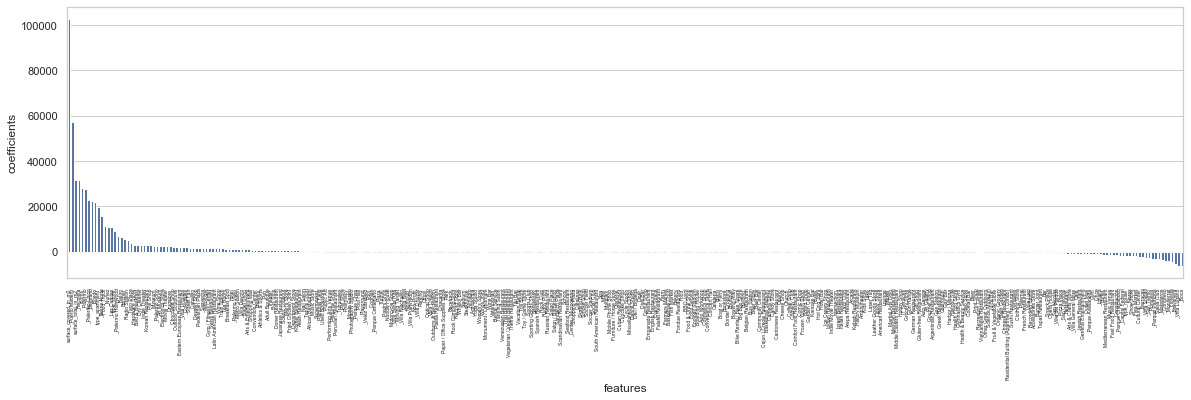

,coefficients,features
1,102783.623055,surface_covered_in_m2
319,57081.604780,_Puerto Madero
0,31629.270553,surface_total_in_m2
320,31549.875373,_Recoleta
2,28163.519185,rooms
307,27466.685861,_Palermo
308,22816.280287,_Palermo Chico
286,22110.564588,_Belgrano
288,21815.649806,_Boedo
278,19700.438715,type_apartment


In [53]:
#coefficients
df_coeff = pd.DataFrame(lasso_model.coef_)
df_coeff['features'] = pd.DataFrame(X_train.columns)
df_coeff.columns=['coefficients','features']
df_coeff = df_coeff.sort_values(by='coefficients', ascending=False)
# figure
f, ax = plt.subplots(figsize=(20, 5))
sns.set(style="whitegrid")
sns.barplot(x="features", y="coefficients", data=df_coeff, color="b")
plt.xticks(rotation=90, size=5)
plt.show()
#dataset
pd.set_option('display.max_rows', 50)
df_coeff.head(50)

## 5. Discussion

With what I have done so far (in terms of data processing and feature extraction) I have obtained an root square error of 124000 USD aprox and a coefficient of determination of 0.65, which is a performance of the not so good model.

Looking at the feature importances, I see that many variables such as "Wine Shop", "Breakfast Spot" are not so important for the prediction process.

Perhaps, by improving or working more on the extraction of information from the "description" variable (for example, using regular expressions), variables can be constructed that help explain the varability of the data. On the other hand, if we evaluate other regression algorithms in conjunction with the search for optimal hyperparameters, perhaps a better predictive power could be achieved.

## 6. Conclusion

We reached at the end of this project analysis, where we got a predictor for the real estates, as the business problem started with benefits of having an automatic appraiser for the Properati company, the data exploration was concentrated on the Buenos Aires area. I have used data from web resources like Properati page, python libraries like Geopy, and Foursquare API, to set up a very realistic data-analysis scenario.
The use of the API served to obtain more information about the surroundings of the houses/departments, thinking that this information could influence in some way the monetary value of them.
At the end, we have obtained a performance of the not so good model, but we have left some proposals to improve it. 

Hopefully, this kind of analysis will provide an initial guidance to take more real-life challenges using data-science.

## References

[1] Foursquare API

[2] Porperati page

